Loading Dataset...
Decision Tree Classifier with Pipeline and GridSearchCV...
Gaussian Naive Bayes Classifier...


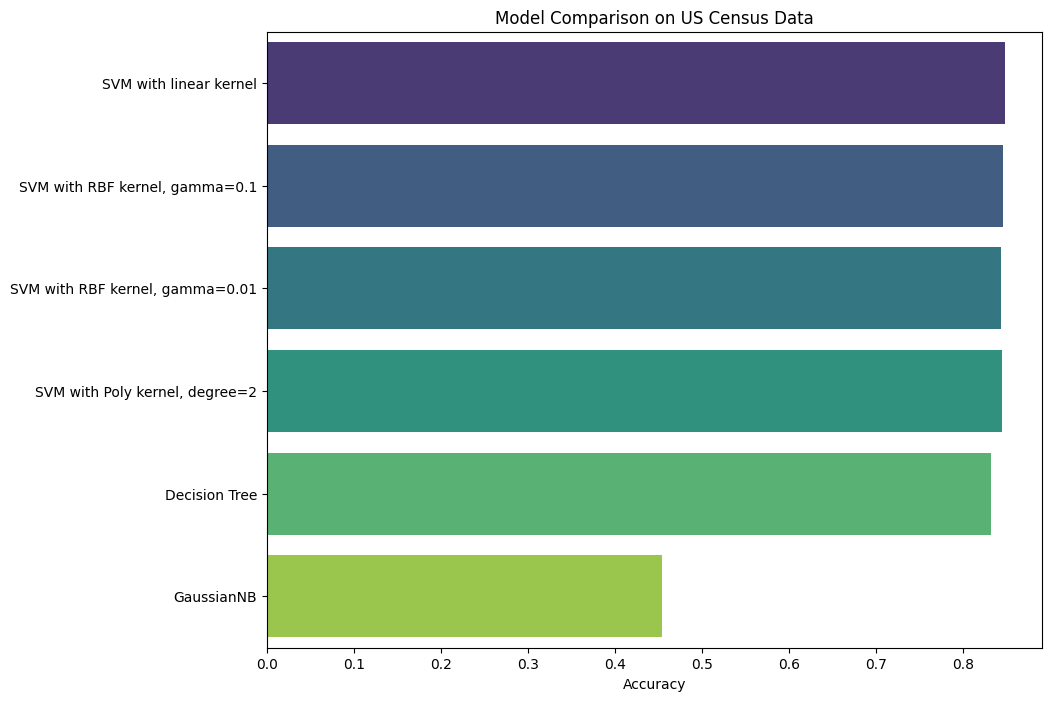

Confusion Matrices and Classification Reports...

SVM with linear kernel Confusion Matrix:


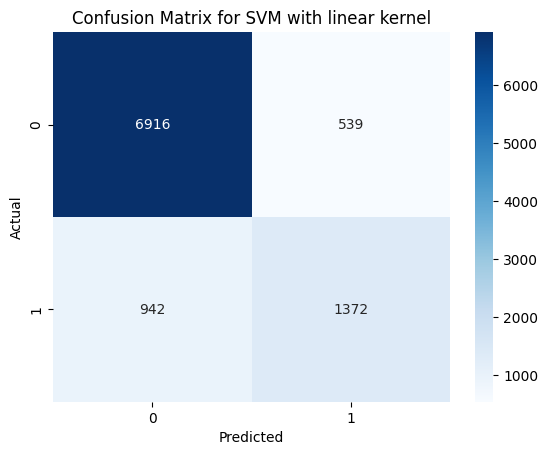

Classification Report for SVM with linear kernel:
              precision    recall  f1-score   support

        -1.0       0.88      0.93      0.90      7455
         1.0       0.72      0.59      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769


SVM with RBF kernel, gamma=0.1 Confusion Matrix:


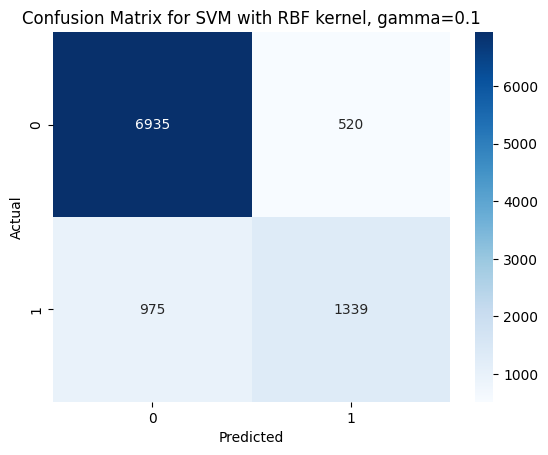

Classification Report for SVM with RBF kernel, gamma=0.1:
              precision    recall  f1-score   support

        -1.0       0.88      0.93      0.90      7455
         1.0       0.72      0.58      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769


SVM with RBF kernel, gamma=0.01 Confusion Matrix:


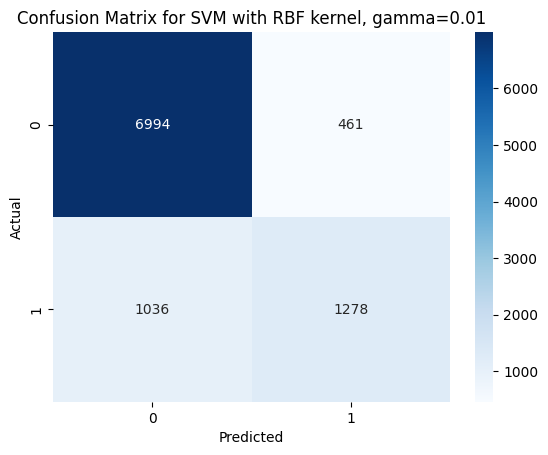

Classification Report for SVM with RBF kernel, gamma=0.01:
              precision    recall  f1-score   support

        -1.0       0.87      0.94      0.90      7455
         1.0       0.73      0.55      0.63      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769


SVM with Poly kernel, degree=2 Confusion Matrix:


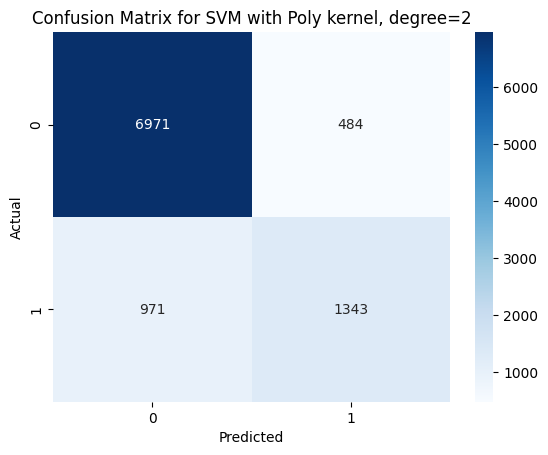

Classification Report for SVM with Poly kernel, degree=2:
              precision    recall  f1-score   support

        -1.0       0.88      0.94      0.91      7455
         1.0       0.74      0.58      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769


Decision Tree Confusion Matrix:


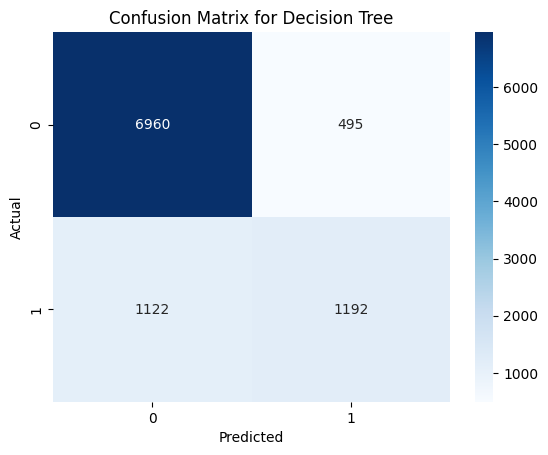

Classification Report for Decision Tree:
              precision    recall  f1-score   support

        -1.0       0.86      0.93      0.90      7455
         1.0       0.71      0.52      0.60      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.72      0.75      9769
weighted avg       0.82      0.83      0.82      9769


GaussianNB Confusion Matrix:


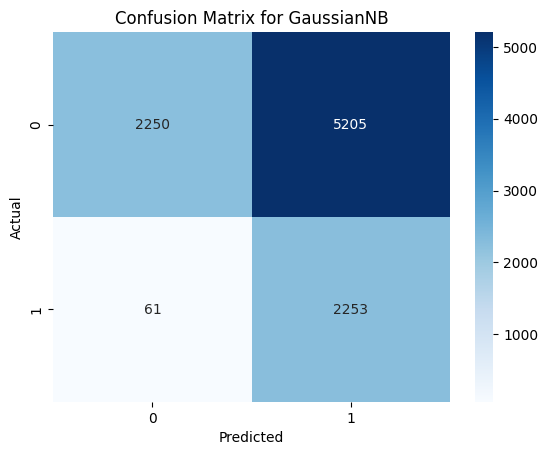

Classification Report for GaussianNB:
              precision    recall  f1-score   support

        -1.0       0.97      0.30      0.46      7455
         1.0       0.30      0.97      0.46      2314

    accuracy                           0.46      9769
   macro avg       0.64      0.64      0.46      9769
weighted avg       0.81      0.46      0.46      9769



In [3]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
print("Loading Dataset...")
X, y = load_svmlight_file("a9a")

# Convert to dense
X_dense = X.todense()

# Split dataset for train and test evaluation at the end
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.3, random_state=42)

# SVM with various kernels
kernels = ['linear', 'rbf', 'poly']
C_values = [1]
gammas = [0.1, 0.01]
degrees = [2]
results = []

for kernel in kernels:
    if kernel == 'rbf':
        for gamma in gammas:
            clf = svm.SVC(kernel=kernel, C=1, gamma=gamma, random_state=42)
            y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
            acc = accuracy_score(y_train, y_pred)
            results.append(('SVM with RBF kernel, gamma=' + str(gamma), acc))
    elif kernel == 'poly':
        for degree in degrees:
            clf = svm.SVC(kernel=kernel, C=1, degree=degree, random_state=42)
            y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
            acc = accuracy_score(y_train, y_pred)
            results.append(('SVM with Poly kernel, degree=' + str(degree), acc))
    else:
        clf = svm.SVC(kernel=kernel, C=1, random_state=42)
        y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
        acc = accuracy_score(y_train, y_pred)
        results.append(('SVM with ' + kernel + ' kernel', acc))

# Decision Tree Classifier with Pipeline and GridSearchCV
print("Decision Tree Classifier with Pipeline and GridSearchCV...")
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0))
param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [5, 10, 15, 20]
}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_acc = grid_search.best_score_
results.append(('Decision Tree', dt_acc))

# Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes Classifier...")
gnb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
gnb_scores = cross_val_score(gnb_pipeline, X_train, y_train, cv=10)
gnb_acc = np.mean(gnb_scores)
results.append(('GaussianNB', gnb_acc))

# Results visualization
labels, accs = zip(*results)

# Bar plot for model comparison
plt.figure(figsize=(10, 8))
sns.barplot(x=accs, y=labels, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Comparison on US Census Data')
plt.show()

# Confusion Matrix for each model
print("Confusion Matrices and Classification Reports...")
for label, model in results:
    if 'SVM' in label:
        kernel_type = label.split()[2]
        if kernel_type == 'RBF':
            gamma_value = float(label.split('=')[-1])
            clf = svm.SVC(kernel='rbf', C=1, gamma=gamma_value, random_state=42)
        elif kernel_type == 'Poly':
            degree_value = int(label.split('=')[-1])
            clf = svm.SVC(kernel='poly', C=1, degree=degree_value, random_state=42)
        else:
            clf = svm.SVC(kernel='linear', C=1, random_state=42)
    elif 'Decision Tree' in label:
        clf = grid_search.best_estimator_
    elif 'GaussianNB' in label:
        clf = gnb_pipeline
    else:
        continue

    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{label} Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification report
    print(f"Classification Report for {label}:")
    print(classification_report(y_test, y_test_pred))
